In [1]:
import sys
%tensorflow_version 1.x
!pip install config
!git clone https://github.com/NVlabs/stylegan2
import tensorflow as tf
sys.path.insert(0, "/content/stylegan2")
print(sys.path)
import dnnlib
import dnnlib.tflib as tflib
import pickle
import matplotlib.pyplot as plt
import numpy as np

TensorFlow 1.x selected.
Cloning into 'stylegan2'...
remote: Enumerating objects: 127, done.
remote: Total 127 (delta 0), reused 0 (delta 0), pack-reused 127
Receiving objects: 100% (127/127), 591.89 KiB | 18.50 MiB/s, done.
Resolving deltas: 100% (58/58), done.
['/content/stylegan2', '/tensorflow-1.15.2/python3.7', '', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']


In [5]:
tflib.init_tf()
path = "/content/drive/MyDrive/stylegan2-ffhq-config-e.pkl"
f=open(path,'rb')
_G, _D, Gs=pickle.load(f)
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.


In [8]:
class generator:
  def __init__(self,n,imgs,latentz):
    self.n=n
    self.imgs=imgs
    self.latentz=[]
    
  def generate(self):
    for i in range(self.n):

      #SAME LATENT SPACE CONTROL BASED ON PARAMETERS OF np.random.RandomState()
      # rnd = np.random.RandomState(5)
      # latents = rnd.randn(1, Gs.input_shape[1])
      #RANDOM IMAGE GENERatION WITH RANDOM LATENT SPACE
      z_sample =random.rand(1,Gs.input_shape[1])
      self.latentz.append(np.asmatrix(np.array([z_sample])))

      (self.imgs).append(np.squeeze( (Gs.run(self.latentz[i], None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)), axis=0))

In [18]:
from numpy import random
imgs=[]  
latentz=[]
number_imgs=1
imgtest=generator(number_imgs,imgs, latentz)
imgtest.generate()



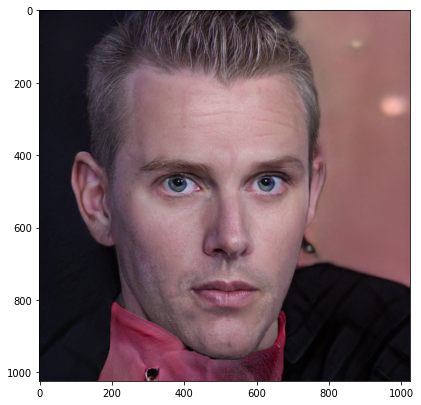

In [19]:
plt.figure(figsize=(15,15))
for i,img in enumerate(imgtest.imgs):
      plt.subplot(2,2,i+1)
      plt.imshow(img)
      

In [55]:
print(imgtest.imgs[0].shape)
Gs.print_layers()

(1024, 1024, 3)

Gs                              Params    OutputShape          WeightShape     
---                             ---       ---                  ---             
latents_in                      -         (?, 512)             -               
labels_in                       -         (?, 0)               -               
lod                             -         ()                   -               
dlatent_avg                     -         (512,)               -               
G_mapping/latents_in            -         (?, 512)             -               
G_mapping/labels_in             -         (?, 0)               -               
G_mapping/Normalize             -         (?, 512)             -               
G_mapping/Dense0                262656    (?, 512)             (512, 512)      
G_mapping/Dense1                262656    (?, 512)             (512, 512)      
G_mapping/Dense2                262656    (?, 512)             (512, 512)      
G_mapping/Dense3       

In [56]:
for i in range(number_imgs):
  src_latents=imgtest.latentz[i]
  src_dlatents = Gs.components.mapping.run(src_latents, None)

In [57]:
#this is the concatenation of the mappings of the latent space
#which acts as the intermediate latent code W
#This space is used for the embedding
print(src_dlatents.shape)

(1, 18, 512)


In [58]:
src_dlatents1=src_dlatents+0.2
src_dlatents2=src_dlatents-0.2

In [59]:
manip1= Gs.components.synthesis.run(src_dlatents1, randomize_noise=False, output_transform=fmt)
manip2= Gs.components.synthesis.run(src_dlatents2, randomize_noise=False, output_transform=fmt)

In [60]:
print(manip1.shape)

(1, 1024, 1024, 3)


In [61]:
manip1=np.squeeze(manip1,axis=0)
manip2=np.squeeze(manip2,axis=0)

In [63]:
test=[]
test.append(imgtest.imgs[0])
test.append(manip1)
test.append(manip2)

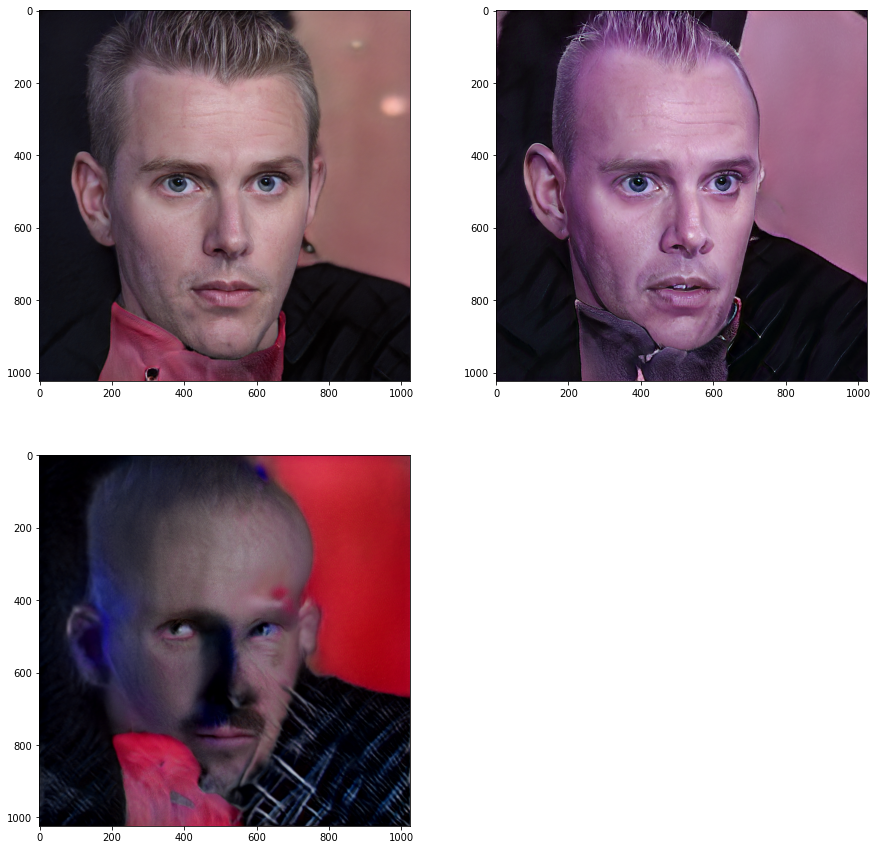

In [64]:
plt.figure(figsize=(15,15))
for i,img in enumerate(test):
      plt.subplot(2,2,i+1)
      plt.imshow(img)